# TASK: Predict each wines class by its attributes

### Wine Dataset

* Collection of chemcial attributes describing Wine samples.

* Attributes:
    * Malic acid
    * Alcalinity of ash
    * Magnesium
    * Alchohol

* Three classes of wine either 1, 2, or 3

In [83]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.image as im
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline


# Data Overview/Setup

In [84]:
df = pd.read_csv("wines.csv")

In [85]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [86]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [87]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Seprating Data, and Labels.
Need to do this so when training the model 

In [88]:
# Data
data = df[[u'Alcohol', u'Malic_acid', u'Ash', u'Alcalinity_of_ash',
       u'Magnesium', u'Total_phenols', u'Flavanoids', u'Nonflavanoid_phenols',
       u'Proanthocyanins', u'Color_intensity', u'Hue',
       u'OD280-OD315_of_diluted_wines', u'Proline']]

In [89]:
# Applying map to transform data into format tensorflow likes.
df.Class = df.Class.apply(lambda x: x-1)
labels = to_categorical(df.Class)

In [90]:
# Does anything need to be done with this data.

### Use this to clean data.

## Making Training, Testing sets

In [91]:
# Splitting up the data.
x_train, x_test, y_train, y_test = train_test_split(data.values, labels, test_size=.2)

# Quick Neural Network Review 
Book: Make your own neural network by Tariq Rashid

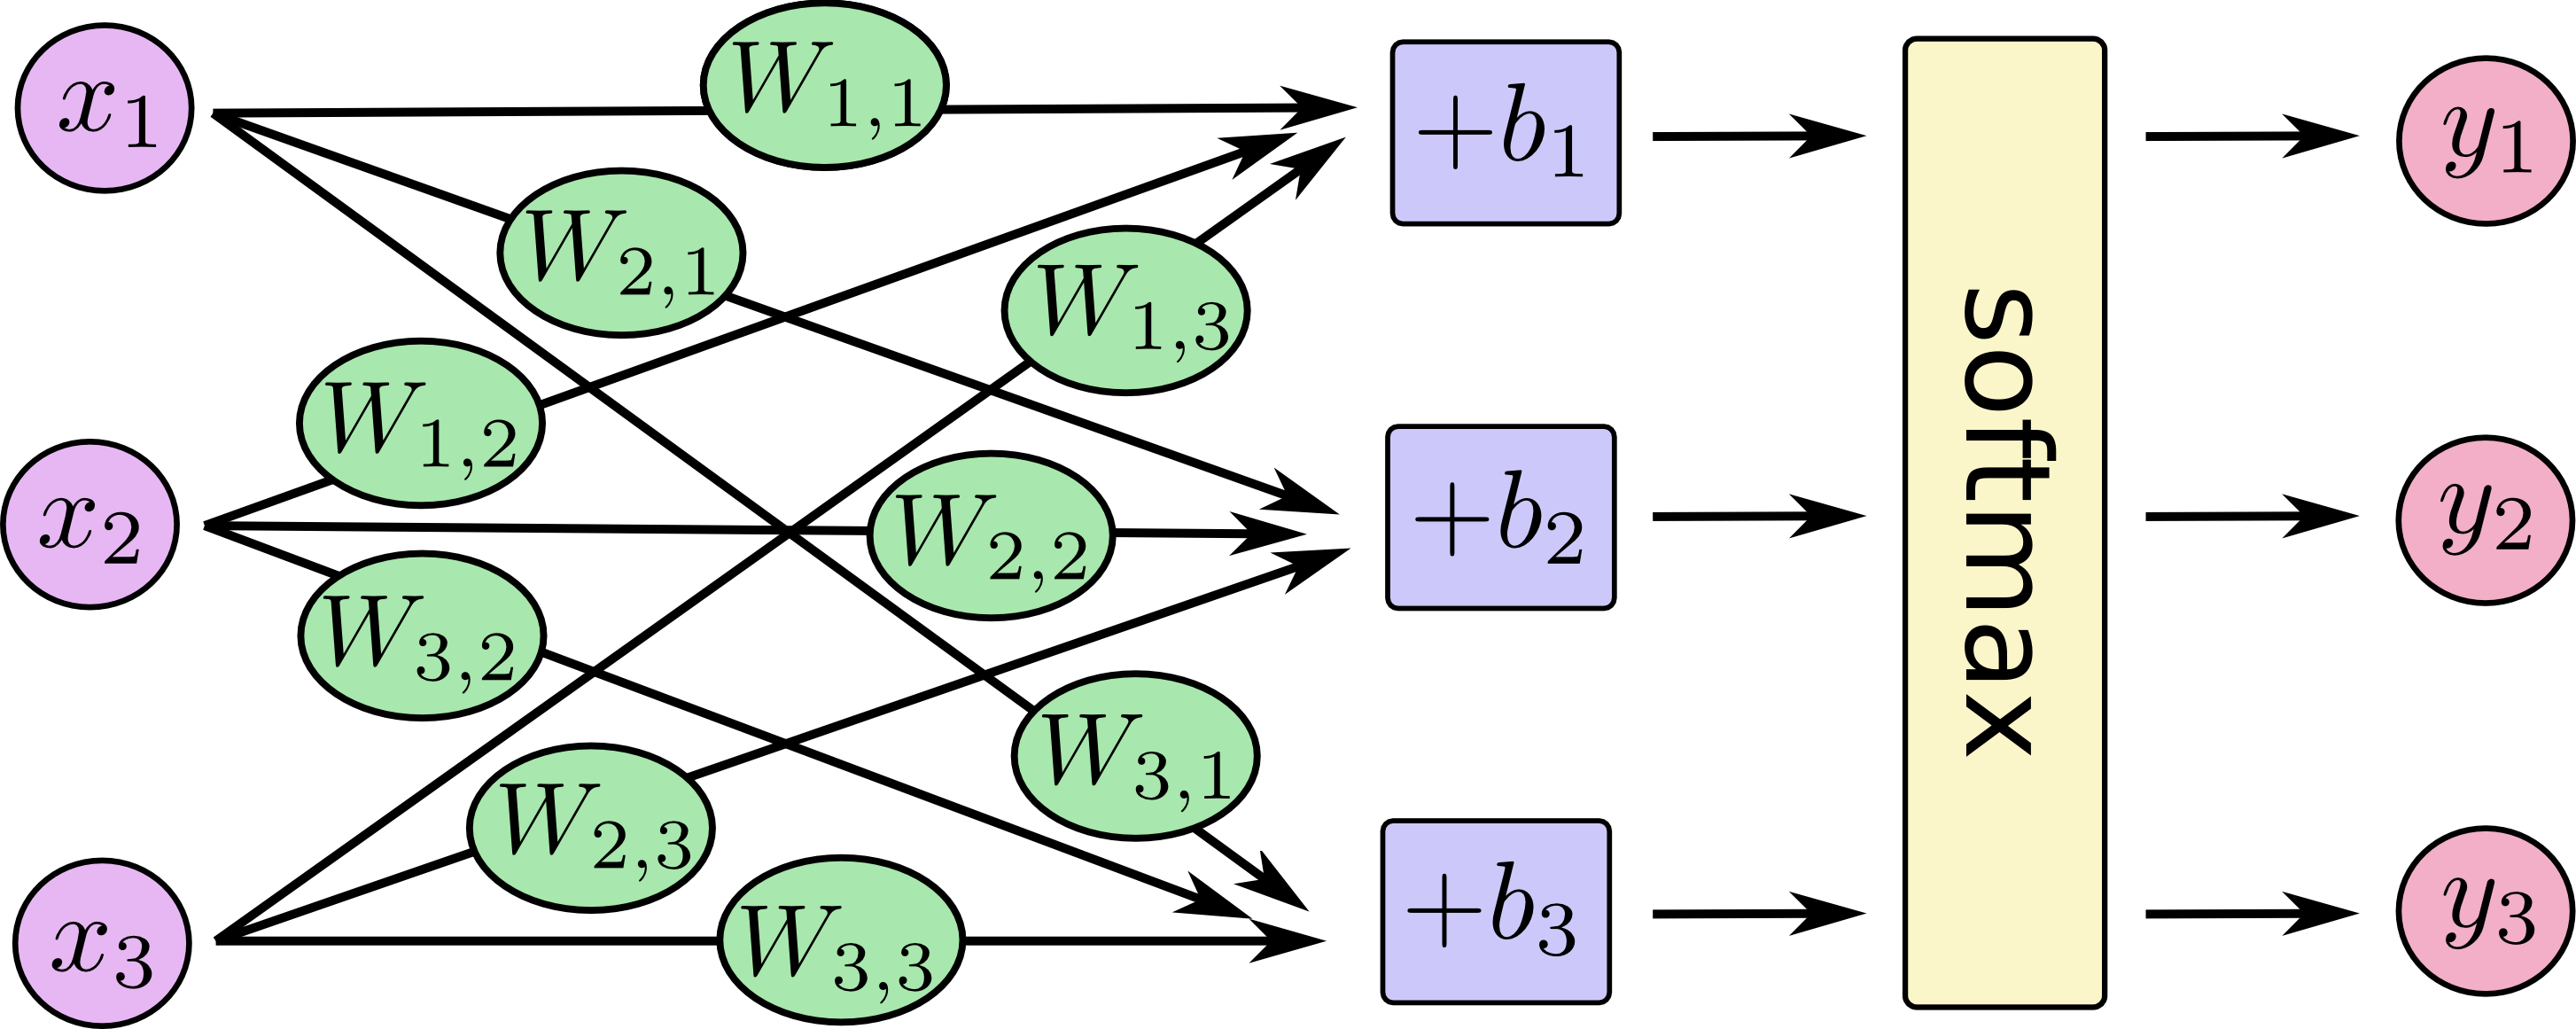

In [92]:
Image('./Image Folder/softmax-regression-scalargraph.png')

# Defining the Model (Could be any other type of ML Model)

In [69]:
# Parameters
learning_rate = 0.001
epochs = 750
batch_size = 32
display_step = 50

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 13 # Number of attributes
num_classes = 3 # Total classes,

In [70]:
# Input Values
x = tf.placeholder("float", [None, num_input])
# Output values
y = tf.placeholder("float", [None, num_classes])

In [71]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

In [72]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [73]:
# Layers in the model.
layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
logits = tf.matmul(layer_2, weights['out']) + biases['out']

In [74]:
# Last layer outputs get sent through a softmax algorithm.
prediction = tf.nn.softmax(logits)

In [75]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [76]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [77]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [78]:
# Helper method to get random batches from the data
def get_batch(train_data, labels, size):
    a = np.arange(0,len(train_data))
    np.random.shuffle(a)
    return train_data[a[:size]], labels[a[:size]]

# Training the Model 

In [82]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for epoch in range(0, epochs):
        
        # Set up the batch.
        batch_x, batch_y = get_batch(x_train, y_train, batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

        # For certain epochs we are going to display some current stats.
        if epoch % display_step == 0:
            
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={x: batch_x, y: batch_y})
            print("Step " + str(epoch) + ", Minibatch Loss= " + "{:.4f}".format(loss) 
                  + ", Training Accuracy= " + "{:.3f}".format(acc))
    print("Training Done.")

    # Calculating Test Accuracy.
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={x: x_test,y: y_test}))

Step 0, Minibatch Loss= 13048.0635, Training Accuracy= 0.312
Step 50, Minibatch Loss= 401.4894, Training Accuracy= 0.656
Step 100, Minibatch Loss= 981.7825, Training Accuracy= 0.656
Step 150, Minibatch Loss= 322.7964, Training Accuracy= 0.656
Step 200, Minibatch Loss= 552.7913, Training Accuracy= 0.750
Step 250, Minibatch Loss= 285.8234, Training Accuracy= 0.812
Step 300, Minibatch Loss= 643.8351, Training Accuracy= 0.750
Step 350, Minibatch Loss= 386.4569, Training Accuracy= 0.812
Step 400, Minibatch Loss= 409.3505, Training Accuracy= 0.719
Step 450, Minibatch Loss= 117.8579, Training Accuracy= 0.906
Step 500, Minibatch Loss= 133.2578, Training Accuracy= 0.938
Step 550, Minibatch Loss= 186.7896, Training Accuracy= 0.844
Step 600, Minibatch Loss= 53.2649, Training Accuracy= 0.969
Step 650, Minibatch Loss= 526.4879, Training Accuracy= 0.812
Step 700, Minibatch Loss= 930.0029, Training Accuracy= 0.656
Training Done.
Testing Accuracy: 0.916667


# "Thus a good learner is forever walking the narrow path between blindness and hallucination." - Pedro Domingos

In [39]:
to_scale = [u'Alcohol', u'Malic_acid', u'Ash', u'Alcalinity_of_ash',
       u'Magnesium', u'Total_phenols', u'Flavanoids', u'Nonflavanoid_phenols',
       u'Proanthocyanins', u'Color_intensity', u'Hue',
       u'OD280-OD315_of_diluted_wines', u'Proline']

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
data[to_scale] = mms.transform(data.copy())
data.head()

C:\Users\HackTheU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HackTheU\Anaconda3\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HackTheU\Anaconda3\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
